In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('function')

from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util

### 载入模型

In [2]:
def wrap_frozen_graph(graph_def, inputs, outputs):
  def _imports_graph_def():
    tf.compat.v1.import_graph_def(graph_def, name="")
  wrapped_import = tf.compat.v1.wrap_function(_imports_graph_def, [])
  import_graph = wrapped_import.graph
  return wrapped_import.prune(
      tf.nest.map_structure(import_graph.as_graph_element, inputs),
      tf.nest.map_structure(import_graph.as_graph_element, outputs))

In [3]:
graph_def = tf.compat.v1.GraphDef()
graph_def.ParseFromString(open('.\model\\frozen_inference_graph_mobilenet.pb','rb').read())
mobile_func = wrap_frozen_graph(graph_def, 
                                inputs='image_tensor:0', 
                                outputs=('detection_boxes:0', 'detection_scores:0','detection_classes:0', 'num_detections:0'))

### 载入图像测试

In [4]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(im_height, im_width, 3).astype(np.uint8)

In [5]:
category_index = {1: {'id': 1, 'name': 'ShuXiang'},
                    2: {'id': 2, 'name': 'HengXiang'},
                    3: {'id': 3, 'name': 'GuiLie'},
                    4: {'id': 4, 'name': 'Keng'},
                    5: {'id': 5, 'name': 'BanMaXian'},
                    6: {'id': 6, 'name': 'ZhongXian'},
                    7: {'id': 7, 'name': 'JinGai'}}

模型预测

In [9]:
image = Image.open('test_image\8.png')
image_np = load_image_into_numpy_array(image)
image_np_expanded = np.expand_dims(image_np, axis=0)
image_tensor = tf.convert_to_tensor(image_np_expanded)
(boxes, scores, classes, num) = mobile_func(image_tensor)

可视化预测结果

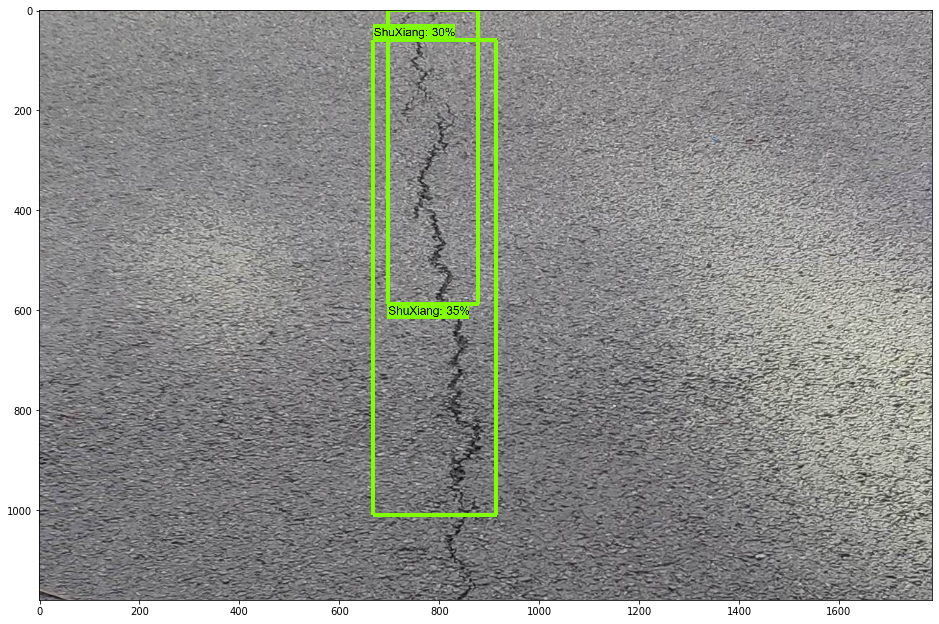

In [10]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    min_score_thresh=0.3,
    use_normalized_coordinates=True,
    line_thickness=8)
plt.figure(figsize=(16, 12))
plt.imshow(image_np)